In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
import string
from collections import Counter
from wordcloud import WordCloud

plt.style.use('ggplot')
pd.set_option('display.max_colwidth', None)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [2]:
import requests
from bs4 import BeautifulSoup


url = "https://en.wikipedia.org/wiki/Key_events_of_the_20th_century"


headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) "
                  "AppleWebKit/605.1.15 (KHTML, like Gecko) Version/18.0 Safari/605.1.15"
}

response = requests.get(url, headers=headers)
response.raise_for_status()  # will error if something is wrong

soup = BeautifulSoup(response.text, "lxml")

# grab the main content text
content_div = soup.find("div", id="mw-content-text")
text = content_div.get_text(separator=" ", strip=True)

print("✅ Page scraped successfully!")
print(text[:800]) 

✅ Page scraped successfully!
The 20th century changed the world in unprecedented ways. The World Wars sparked tension between countries and led to the creation of atomic bombs , the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created. These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today. Historic events in the 20th century [ edit ] World at the beginning of the century [ edit ] Main article: Edwardian era The new beginning of the 20th century marked significant changes. The 1900s saw the decade herald a series of inventions, including the automobile , airplane and radio broadcasting . 1914 saw the completion of the Panama Canal . The Scramble for Africa continued in the 1900s and resulted in wars an


In [3]:
output_path = "/Users/saraseid/Desktop/20th-century/20th_century_events.txt"

with open(output_path, "w", encoding="utf-8") as f:
    f.write(text)

print("✅ Text saved to:", output_path)
print("Characters saved:", len(text))

✅ Text saved to: /Users/saraseid/Desktop/20th-century/20th_century_events.txt
Characters saved: 111405


In [4]:
file_path = "/Users/saraseid/Desktop/20th-century/20th_century_events.txt"

with open(file_path, "r", errors="ignore") as file:
    text_data = file.read()

print("✅ File loaded successfully!")
print(text_data[:500])

✅ File loaded successfully!
The 20th century changed the world in unprecedented ways. The World Wars sparked tension between countries and led to the creation of atomic bombs , the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created. These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today. Historic events in the 20th century [ edit ] World at the beginning of the century [ edit ] Main article: Edwardian era


In [5]:
import re
import string
from collections import Counter

# Lowercase the text
clean_text = text_data.lower()

# Remove punctuation and digits
clean_text = re.sub(rf"[{re.escape(string.punctuation)}0-9]", " ", clean_text)

# Remove extra spaces
clean_text = re.sub(r"\s+", " ", clean_text).strip()

# 4. Tokenize into words
tokens = clean_text.split()

print("✅ Tokenization complete!")
print(tokens[:20])  

✅ Tokenization complete!
['the', 'th', 'century', 'changed', 'the', 'world', 'in', 'unprecedented', 'ways', 'the', 'world', 'wars', 'sparked', 'tension', 'between', 'countries', 'and', 'led', 'to', 'the']


In [6]:
word_counts = Counter(tokens)

# Get top 10 words
top_10 = word_counts.most_common(10)
top_10

[('the', 1439),
 ('of', 614),
 ('and', 413),
 ('in', 333),
 ('to', 328),
 ('december', 225),
 ('a', 214),
 ('war', 209),
 ('retrieved', 209),
 ('was', 144)]

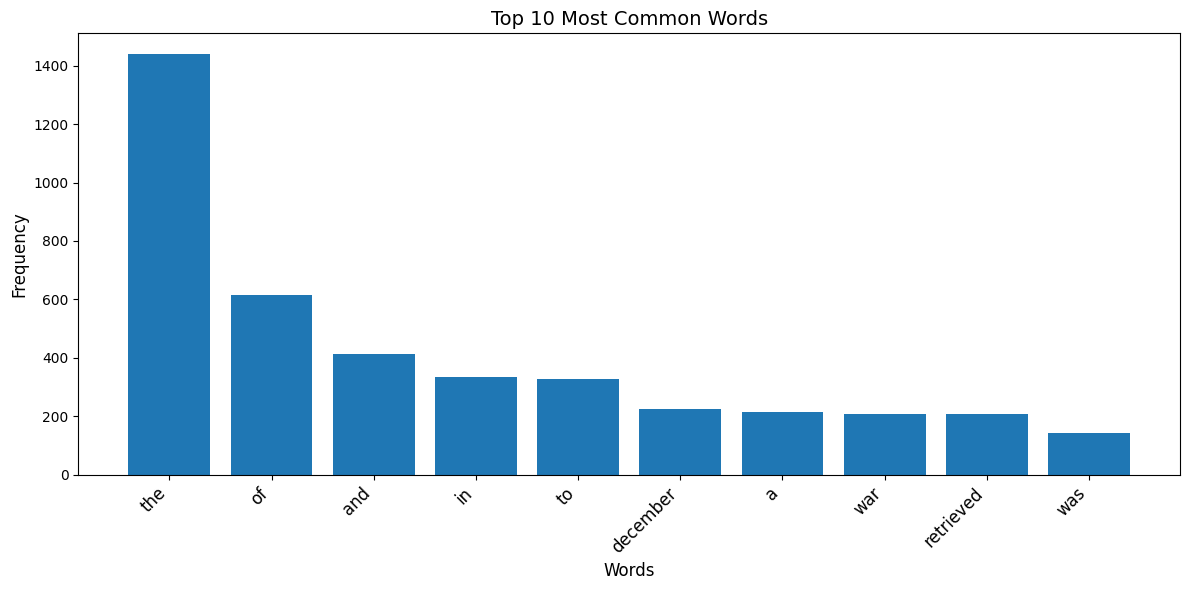

In [8]:
import matplotlib.pyplot as plt

# create lists for plotting
words = [w for w, c in top_10]
counts = [c for w, c in top_10]

plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.title("Top 10 Most Common Words", fontsize=14)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

In [9]:
stopwords = {
    "the", "and", "of", "to", "in", "a", "for", "on", "that", "as", "by", "with", 
    "at", "from", "is", "was", "were", "be", "or", "an", "it", "this", "which",
    "are", "their", "his", "her", "they", "them", "but", "not", "have", "has",
    "had", "also", "more", "most", "other", "such", "than", "into"
}

In [10]:
filtered_tokens = [word for word in tokens if word not in stopwords]

print("Token count before:", len(tokens))
print("Token count after:", len(filtered_tokens))

Token count before: 15792
Token count after: 11003


In [11]:
from collections import Counter

filtered_counts = Counter(filtered_tokens)
top_10_filtered = filtered_counts.most_common(10)
top_10_filtered

[('december', 225),
 ('war', 209),
 ('retrieved', 209),
 ('s', 132),
 ('world', 111),
 ('–', 94),
 ('th', 82),
 ('history', 77),
 ('soviet', 63),
 ('new', 54)]

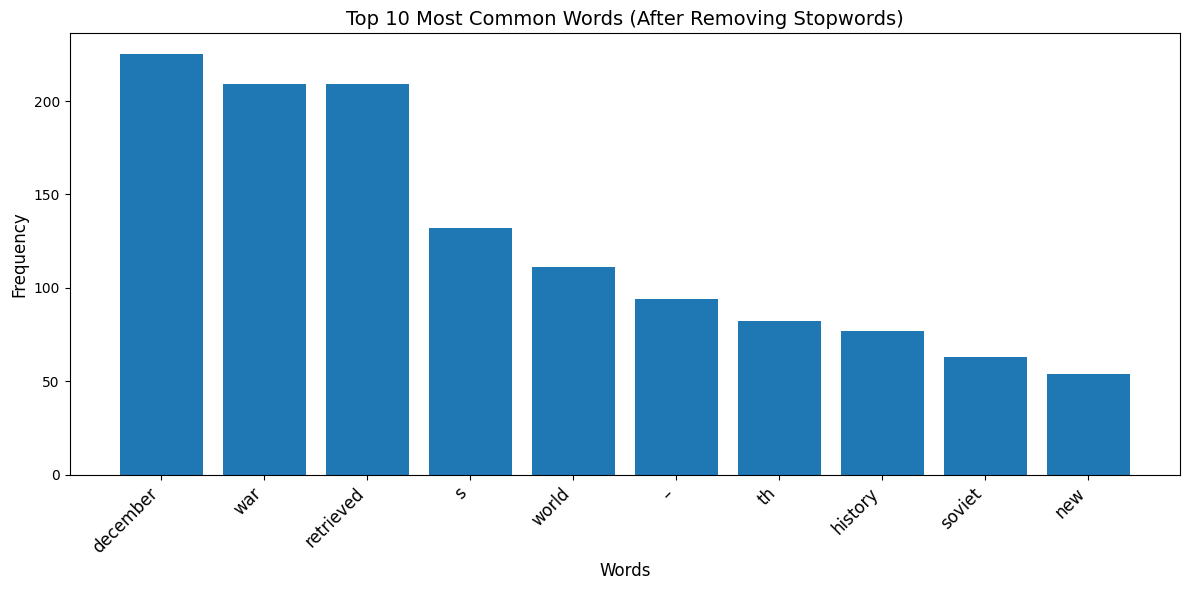

In [12]:
import matplotlib.pyplot as plt

words_f = [w for w, c in top_10_filtered]
counts_f = [c for w, c in top_10_filtered]

plt.figure(figsize=(12,6))
plt.bar(words_f, counts_f)
plt.title("Top 10 Most Common Words (After Removing Stopwords)", fontsize=14)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

After removing stopwords like “the” and “and,” the top words in the plot changed from common filler words to more meaningful terms. This gives a clearer picture of the main topics in the text and makes the word frequency plot more informative

In [2]:
file_path = "/Users/saraseid/Desktop/20th-century/20th_century_events.txt"

with open(file_path, "r", errors="ignore") as file:
    text_data = file.read()

print("File loaded successfully!")
print(text_data[:500])

File loaded successfully!
The 20th century changed the world in unprecedented ways. The World Wars sparked tension between countries and led to the creation of atomic bombs , the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created. These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today. Historic events in the 20th century [ edit ] World at the beginning of the century [ edit ] Main article: Edwardian era


In [3]:
from textblob import TextBlob

blob = TextBlob(text_data)
tags = blob.tags
tags[:20]

[('The', 'DT'),
 ('20th', 'JJ'),
 ('century', 'NN'),
 ('changed', 'VBD'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('in', 'IN'),
 ('unprecedented', 'JJ'),
 ('ways', 'NNS'),
 ('The', 'DT'),
 ('World', 'NNP'),
 ('Wars', 'NNP'),
 ('sparked', 'VBD'),
 ('tension', 'NN'),
 ('between', 'IN'),
 ('countries', 'NNS'),
 ('and', 'CC'),
 ('led', 'VBD'),
 ('to', 'TO'),
 ('the', 'DT')]

In [4]:
from collections import Counter

# extract only the POS tags
pos_tags = [tag for (word, tag) in tags]

# count them and get top 10
top_10_pos = Counter(pos_tags).most_common(10)
top_10_pos

[('NNP', 4183),
 ('NN', 2124),
 ('IN', 1872),
 ('DT', 1799),
 ('CD', 1760),
 ('JJ', 1306),
 ('NNS', 803),
 ('VBD', 802),
 ('RB', 619),
 ('VBN', 515)]

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# convert your top_10_pos list into a DataFrame
df_pos = pd.DataFrame(top_10_pos, columns=["POS", "Count"])

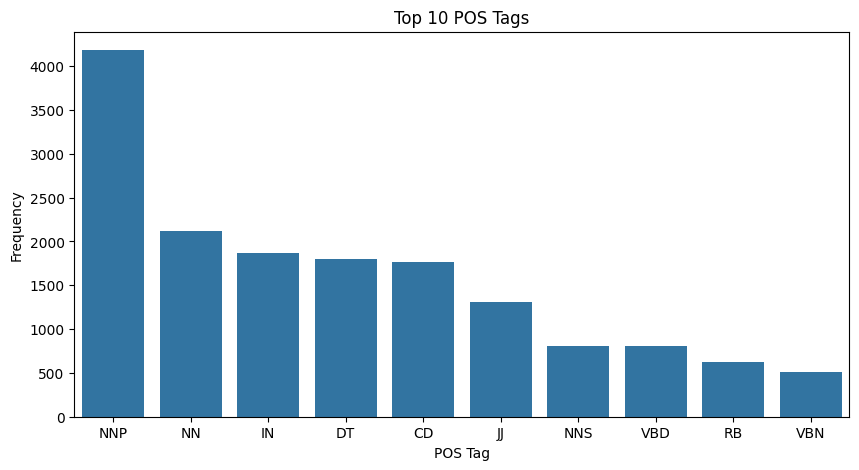

In [6]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_pos, x="POS", y="Count")
plt.title("Top 10 POS Tags")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.show()

In [7]:
from collections import Counter

# separate by POS tag groups
nouns = [word for (word, tag) in tags if tag.startswith("NN")]
verbs = [word for (word, tag) in tags if tag.startswith("VB")]
adjectives = [word for (word, tag) in tags if tag.startswith("JJ")]

# count top 15 from each group
top15_nouns = Counter(nouns).most_common(15)
top15_verbs = Counter(verbs).most_common(15)
top15_adjs = Counter(adjectives).most_common(15)

top15_nouns, top15_verbs, top15_adjs

([('December', 225),
  ('^', 199),
  (']', 151),
  ('War', 120),
  ('war', 77),
  ('World', 74),
  ('Hitler', 51),
  ('History', 43),
  ('Germany', 41),
  ('ISBN', 40),
  ('world', 37),
  ('–', 36),
  ('Soviet', 35),
  ('edit', 34),
  ('[', 33)],
 [('Retrieved', 209),
  ('was', 136),
  ('were', 64),
  (']', 63),
  ('had', 45),
  ('became', 29),
  ('be', 25),
  ('[', 24),
  ('been', 16),
  ('led', 15),
  ('made', 14),
  ('Archived', 14),
  ('known', 13),
  ('used', 13),
  ('did', 13)],
 [(']', 82),
  ('^', 53),
  ('first', 37),
  ('German', 30),
  ('nuclear', 26),
  ('Japanese', 25),
  ('new', 23),
  ('Soviet', 21),
  ('other', 19),
  ('many', 19),
  ('British', 18),
  ('20th', 17),
  ('American', 16),
  ('such', 16),
  ('original', 14)])

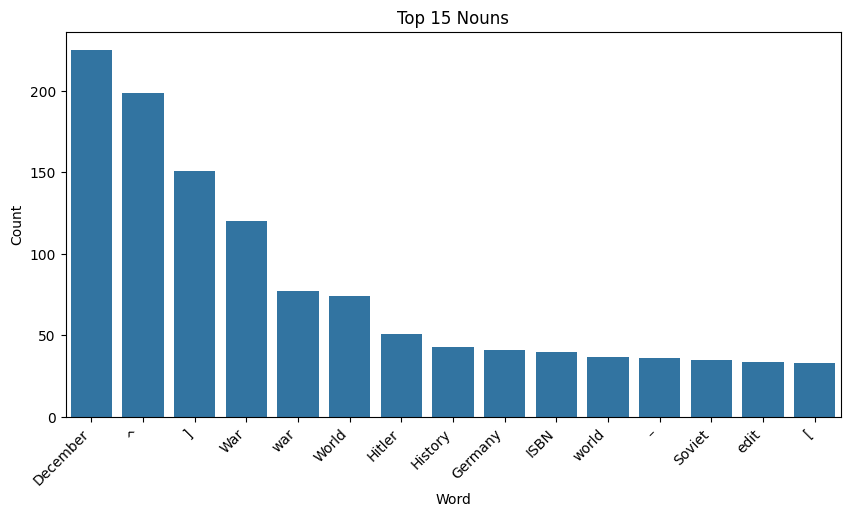

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df_nouns = pd.DataFrame(top15_nouns, columns=["Word", "Count"])

plt.figure(figsize=(10,5))
sns.barplot(data=df_nouns, x="Word", y="Count")
plt.title("Top 15 Nouns")
plt.xticks(rotation=45, ha="right")
plt.show()

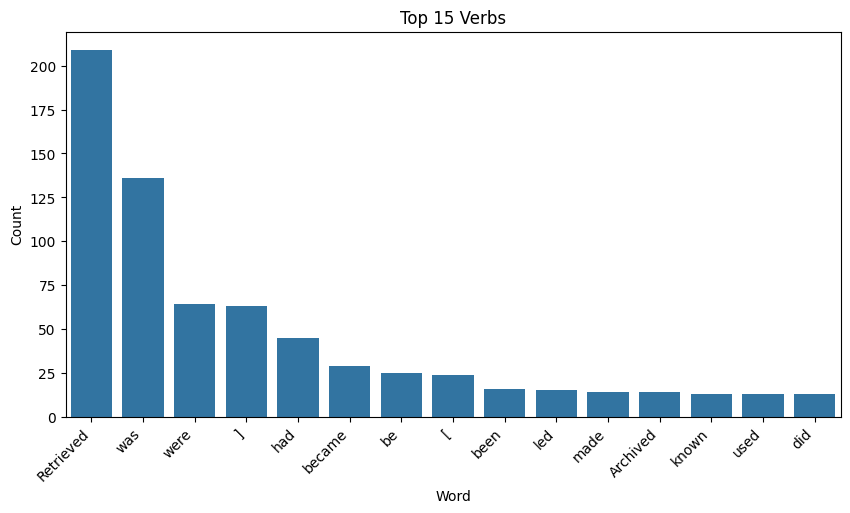

In [9]:
df_verbs = pd.DataFrame(top15_verbs, columns=["Word", "Count"])

plt.figure(figsize=(10,5))
sns.barplot(data=df_verbs, x="Word", y="Count")
plt.title("Top 15 Verbs")
plt.xticks(rotation=45, ha="right")
plt.show()

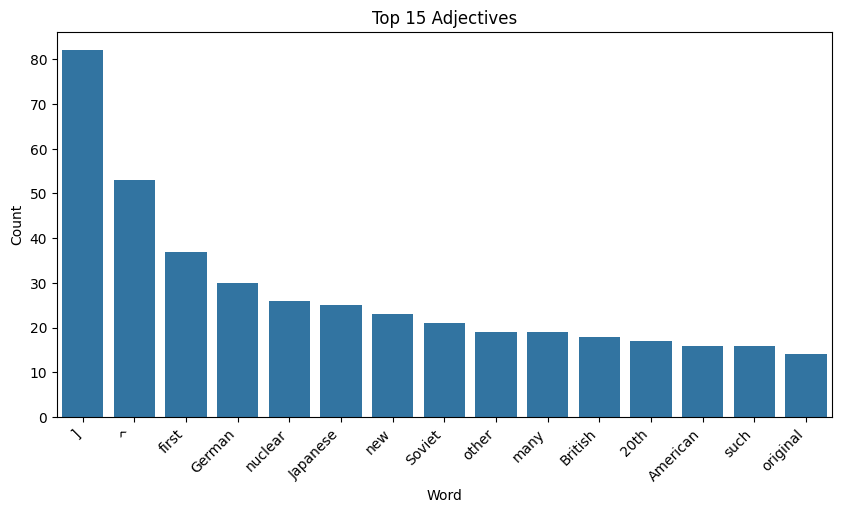

In [10]:
df_adjs = pd.DataFrame(top15_adjs, columns=["Word", "Count"])

plt.figure(figsize=(10,5))
sns.barplot(data=df_adjs, x="Word", y="Count")
plt.title("Top 15 Adjectives")
plt.xticks(rotation=45, ha="right")
plt.show()

Nouns appear most often because the article names many people, places, and events. Verbs are fewer and mostly in past tense, reflecting historical actions. Adjectives are the least common, showing the article is factual rather than descriptive.

In [11]:
countries = [
    "Afghanistan","Albania","Algeria","Andorra","Angola","Argentina","Armenia","Australia",
    "Austria","Azerbaijan","Bahamas","Bahrain","Bangladesh","Barbados","Belarus","Belgium",
    "Belize","Benin","Bhutan","Bolivia","Bosnia","Botswana","Brazil","Brunei","Bulgaria",
    "Burkina","Burundi","Cambodia","Cameroon","Canada","Chad","Chile","China","Colombia",
    "Comoros","Congo","Costa Rica","Croatia","Cuba","Cyprus","Czech","Denmark","Djibouti",
    "Dominica","Ecuador","Egypt","El Salvador","Eritrea","Estonia","Eswatini","Ethiopia",
    "Fiji","Finland","France","Gabon","Gambia","Georgia","Germany","Ghana","Greece",
    "Grenada","Guatemala","Guinea","Guyana","Haiti","Honduras","Hungary","Iceland","India",
    "Indonesia","Iran","Iraq","Ireland","Israel","Italy","Jamaica","Japan","Jordan",
    "Kazakhstan","Kenya","Kiribati","Kuwait","Kyrgyzstan","Laos","Latvia","Lebanon",
    "Lesotho","Liberia","Libya","Liechtenstein","Lithuania","Luxembourg","Madagascar",
    "Malawi","Malaysia","Maldives","Mali","Malta","Mauritania","Mauritius","Mexico",
    "Moldova","Monaco","Mongolia","Montenegro","Morocco","Mozambique","Myanmar","Namibia",
    "Nauru","Nepal","Netherlands","New Zealand","Nicaragua","Niger","Nigeria","Norway",
    "Oman","Pakistan","Palau","Panama","Paraguay","Peru","Philippines","Poland","Portugal",
    "Qatar","Romania","Russia","Rwanda","Samoa","Senegal","Serbia","Seychelles","Sierra Leone",
    "Singapore","Slovakia","Slovenia","Somalia","Spain","Sudan","Suriname","Sweden",
    "Switzerland","Syria","Taiwan","Tajikistan","Tanzania","Thailand","Togo","Tonga",
    "Tunisia","Turkey","Turkmenistan","Uganda","Ukraine","Uruguay","Uzbekistan",
    "Venezuela","Vietnam","Yemen","Zambia","Zimbabwe"
]

In [13]:
import re, string

clean_text = text_data.lower()
clean_text = re.sub(rf"[{re.escape(string.punctuation)}0-9]", " ", clean_text)
clean_text = re.sub(r"\s+", " ", clean_text).strip()

In [14]:
country_counts = {}

for country in countries:
    count = clean_text.lower().count(country.lower())
    if count > 0:
        country_counts[country] = count

In [15]:
df_countries = pd.DataFrame(country_counts.items(), columns=["Country", "Count"])
df_countries

,Country,Count
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Angola,1
4,Australia,6
...,...,...
61,Sudan,1
62,Sweden,1
63,Thailand,1
64,Ukraine,2


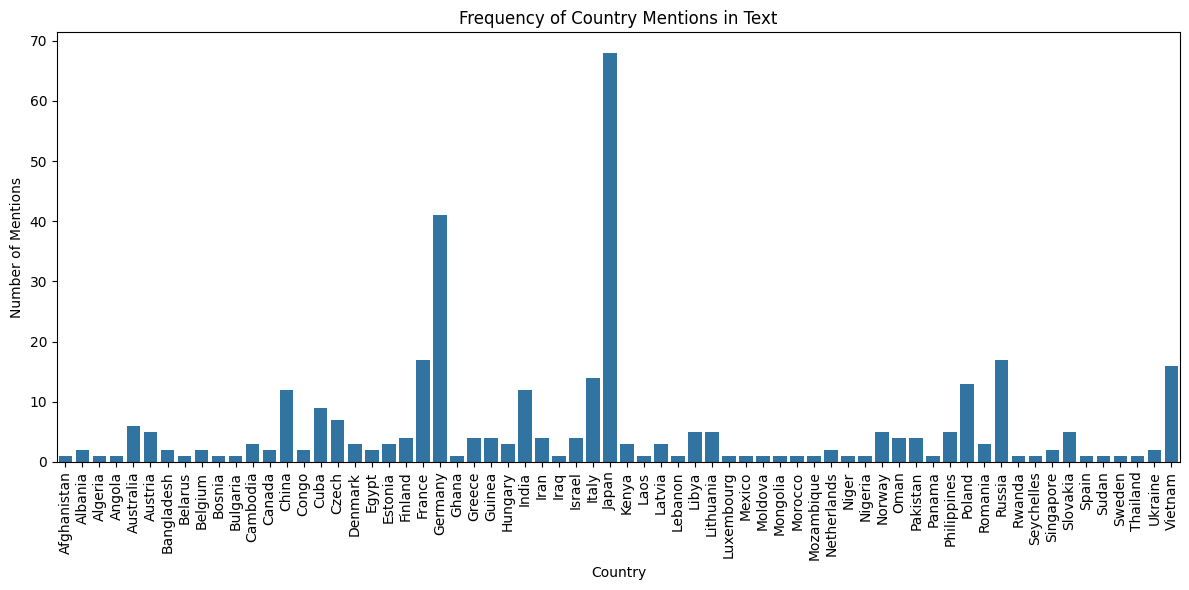

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=df_countries, x="Country", y="Count")
plt.xticks(rotation=90)
plt.title("Frequency of Country Mentions in Text")
plt.xlabel("Country")
plt.ylabel("Number of Mentions")
plt.tight_layout()
plt.show()

Most countries appear only once or twice, while a few are mentioned much more often. This suggests the article focuses mainly on major world powers and key countries involved in major 20th-century events.